In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
data=pd.read_csv('/content/ITC.csv')

In [331]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN




*   Volume,Turnover,Trades are the metrics indicating trading activity
*   Prev Close, Open, High, Low, Last, Close: Stock price data.


*   Deliverable Volume, %Deliverble: Indicators of stock deliverability.





In [332]:
data.shape

(5306, 15)

 Analyze the indicators in the dataset that best explain the volatility and
 unpredictable nature of the stocks in the last decade.



*  Calculating volatility metrics:High-low % range,Daily Change %




In [333]:
data['Date']=pd.to_datetime(data['Date'])

In [334]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN


In [335]:
data['High-Low Range %'] = ((data['High'] - data['Low']) / data['Low']) * 100


In [336]:
data['Daily Change %'] = ((data['Close'] - data['Prev Close']) / data['Prev Close']) * 100


* Daily Change %: Indicates the percentage change in stock price from the previous close to the current close.
*  High-Low Range %:Represents the daily range as a percentage of the closing price.
The average daily range is approximately 3.54%, with a standard deviation of 2.55%.
Maximum observed daily range is 93.56%, suggesting highly volatile days.





In [337]:
df=data.loc[:,'Prev Close':]

In [338]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN,4.962963,8.003049
1,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN,4.997840,0.543402
2,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN,14.984848,1.944269
3,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN,5.843455,8.000551
4,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN,2.797330,8.000765


In [339]:
new_df=data[(data['Date']>'2014-12-01')& (data['Date']<'2024-12-02')]#dataset of last decade

In [340]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
3719,2014-12-02,ITC,EQ,364.60,364.40,366.9,363.60,366.45,365.80,365.29,5728959,2.092709e+14,66051.0,4776646.0,0.8338,0.907591,0.329128
3720,2014-12-03,ITC,EQ,365.80,366.00,366.0,357.10,364.50,363.25,361.28,5241220,1.893546e+14,64066.0,3717848.0,0.7093,2.492299,-0.697102
3721,2014-12-04,ITC,EQ,363.25,373.05,384.0,373.05,383.05,383.15,380.58,17783568,6.768100e+14,136573.0,12070996.0,0.6788,2.935263,5.478321
3722,2014-12-05,ITC,EQ,383.15,383.00,392.0,382.65,390.40,391.35,387.89,10854436,4.210352e+14,98017.0,7818749.0,0.7203,2.443486,2.140154
3723,2014-12-08,ITC,EQ,391.35,393.20,399.7,392.30,397.70,397.80,396.47,10054410,3.986296e+14,105479.0,6728663.0,0.6692,1.886311,1.648141


In [341]:
df=new_df.loc[:,'Prev Close':]

In [342]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
Prev Close,1.000000,0.997176,0.996098,0.995501,0.994381,0.994436,0.995840,-0.489469,-0.286033,-0.435455,-0.381522,0.496352,-0.143477,-0.054387
Open,0.997176,1.000000,0.998453,0.998161,0.996799,0.996894,0.998249,-0.490391,-0.286356,-0.435206,-0.383859,0.495198,-0.148949,-0.010933
High,0.996098,0.998453,1.000000,0.997598,0.998328,0.998414,0.999118,-0.474566,-0.268817,-0.419650,-0.370338,0.485507,-0.119892,0.016999
Low,0.995501,0.998161,0.997598,1.000000,0.998560,0.998633,0.999297,-0.505712,-0.303675,-0.453555,-0.400509,0.499189,-0.185289,0.021604
Last,0.994381,0.996799,0.998328,0.998560,1.000000,0.999916,0.999420,-0.488664,-0.285838,-0.436817,-0.384725,0.491386,-0.152834,0.047230
Close,0.994436,0.996894,0.998414,0.998633,0.999916,1.000000,0.999518,-0.488780,-0.285836,-0.436970,-0.384817,0.491602,-0.152799,0.047560
VWAP,0.995840,0.998249,0.999118,0.999297,0.999420,0.999518,1.000000,-0.490309,-0.286370,-0.437035,-0.386068,0.491908,-0.153918,0.028623
Volume,-0.489469,-0.490391,-0.474566,-0.505712,-0.488664,-0.488780,-0.490309,1.000000,0.954859,0.893882,0.913091,-0.431076,0.540828,0.045806
Turnover,-0.286033,-0.286356,-0.268817,-0.303675,-0.285838,-0.285836,-0.286370,0.954859,1.000000,0.869578,0.904293,-0.328923,0.528334,0.043109
Trades,-0.435455,-0.435206,-0.419650,-0.453555,-0.436817,-0.436970,-0.437035,0.893882,0.869578,1.000000,0.820354,-0.402845,0.568552,0.011848


Correlation Analysis
High-Low Range %--



* Trades:Positive Correlation(0.568) between High-low range(%) and Trades
*  Volume:Positive Correlation(0.54).Increase in Volume lead to increase in Trades.  

*  Turnover:Positive Correlation(0.52).Increase in Turnover lead to increase in High-Low Range
*  Deliverable%:Negative Correlation(-0.24) between Deliverable Volume and High ow Range%








Daily Change % (Price Change Volatility):
* Turnover:Positive correlation(0.043) suggest a slight relationship between Turnover and Daily Change%.
* Trades: Positive correlation(0.011) suggest a slight relationship between Turnover and Daily Change%.

* Volume:Positive Correlation(0.045) suggest a positive relationship
*  Deliverable Volume:Positive Correlation(-0.0006)suggest a negative relationship between Deliverable Volume and Daily Change%.
   

Insights

1.  Trades and Volume are critical indicators of intraday volatility.
2.  Turnover slightly affects price volatility but has a stronger impact on intraday volatility.
3.%Deliverable inversely correlates with both volatility measures, potentially indicating that stocks with more speculative trading (lower deliverability) are more volatile

In [343]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [344]:
for col in data.columns:
  if data[col].dtype=='int64' or data[col].dtype=='float64':
    data[col]=data[col].fillna(data[col].mean())

In [345]:
data.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


#Choose promising stock based on your analysis for your portfolio

In [346]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.00,708.50,708.50,701.81,562715,3.949174e+13,94563.757736,4.571758e+06,0.591634,4.962963,8.003049
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.30,710.65,712.35,714.16,712637,5.089379e+13,94563.757736,4.571758e+06,0.591634,4.997840,0.543402
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.00,731.00,726.20,732.43,1382149,1.012325e+14,94563.757736,4.571758e+06,0.591634,14.984848,1.944269
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.00,784.30,784.30,776.63,721618,5.604266e+13,94563.757736,4.571758e+06,0.591634,5.843455,8.000551
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.00,847.05,847.05,841.25,231209,1.945046e+13,94563.757736,4.571758e+06,0.591634,2.797330,8.000765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ITC,EQ,205.35,205.80,206.75,204.70,205.50,205.30,205.64,19886214,4.089370e+14,103777.000000,1.144923e+07,0.575700,1.001466,-0.024349
5302,2021-04-27,ITC,EQ,205.30,205.30,206.95,205.05,205.50,205.40,205.85,11444814,2.355887e+14,94890.000000,4.863874e+06,0.425000,0.926603,0.048709
5303,2021-04-28,ITC,EQ,205.40,206.00,206.50,205.30,205.65,205.50,205.96,12708021,2.617327e+14,69476.000000,7.221020e+06,0.568200,0.584510,0.048685
5304,2021-04-29,ITC,EQ,205.50,207.10,207.55,204.05,204.40,204.30,205.37,13096755,2.689642e+14,95800.000000,5.887019e+06,0.449500,1.715266,-0.583942


In [347]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High-Low Range %', 'Daily Change %'],
      dtype='object')

In [348]:
# Calculate summary statistics by stock
stock_analysis = data.groupby('Symbol').agg({
    'Daily Change %': ['mean', 'std', lambda x: (x > 0).sum() / len(x)],  # Mean, Std Dev, and Positive Return Frequency
    'High-Low Range %': ['mean'],                                           # Mean volatility
    'Volume': ['mean'],                                                   # Mean trading volume
    '%Deliverble': ['mean'],                                              # Mean deliverable percentage
    'VWAP': ['mean']                                                      # Average VWAP
})

# Flatten column names
stock_analysis.columns = [
    'Mean Return (%)', 'Return Std Dev (%)', 'Positive Return Frequency',
    'Mean Volatility (%)', 'Mean Volume', 'Mean Deliverable (%)', 'Mean VWAP'
]

# Define thresholds or scores for the criteria
stock_analysis['Consistency Score'] = stock_analysis['Positive Return Frequency'] * 100  # Positive return frequency as a percentage
stock_analysis['Moderate Volatility Score'] = -abs(stock_analysis['Mean Volatility (%)'] - stock_analysis['Mean Volatility (%)'].median())
stock_analysis['High Volume Score'] = stock_analysis['Mean Volume'] / stock_analysis['Mean Volume'].max() * 100  # Volume as a percentage of the max volume
stock_analysis['Trend Score'] = stock_analysis['Mean Deliverable (%)'] + stock_analysis['Mean VWAP']  # Simplified trend measure

# Combine scores for overall ranking
stock_analysis['Overall Score'] = (
    stock_analysis['Consistency Score'] +
    stock_analysis['Moderate Volatility Score'] +
    stock_analysis['High Volume Score'] +
    stock_analysis['Trend Score']
)

# Rank stocks based on the overall score
stock_analysis['Rank'] = stock_analysis['Overall Score'].rank(ascending=False)

# Select the top stocks based on overall rank
top_consistent_stocks = stock_analysis.sort_values('Rank').head(5).reset_index()

# Display the top stocks
print(top_consistent_stocks[['Symbol', 'Mean Return (%)', 'Positive Return Frequency',
                             'Mean Volatility (%)', 'Mean Volume',
                             'Mean Deliverable (%)', 'Mean VWAP', 'Overall Score']])


  Symbol  Mean Return (%)  Positive Return Frequency  Mean Volatility (%)  \
0    ITC         0.033708                   0.505654             2.936347   

    Mean Volume  Mean Deliverable (%)   Mean VWAP  Overall Score  
0  7.173165e+06              0.591634  420.522927     571.679959  


In [349]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,94563.757736,4.571758e+06,0.591634,4.962963,8.003049
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,94563.757736,4.571758e+06,0.591634,4.997840,0.543402
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,94563.757736,4.571758e+06,0.591634,14.984848,1.944269
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,94563.757736,4.571758e+06,0.591634,5.843455,8.000551
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,94563.757736,4.571758e+06,0.591634,2.797330,8.000765


In [350]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.00,708.50,708.50,701.81,562715,3.949174e+13,94563.757736,4.571758e+06,0.591634,4.962963,8.003049
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.30,710.65,712.35,714.16,712637,5.089379e+13,94563.757736,4.571758e+06,0.591634,4.997840,0.543402
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.00,731.00,726.20,732.43,1382149,1.012325e+14,94563.757736,4.571758e+06,0.591634,14.984848,1.944269
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.00,784.30,784.30,776.63,721618,5.604266e+13,94563.757736,4.571758e+06,0.591634,5.843455,8.000551
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.00,847.05,847.05,841.25,231209,1.945046e+13,94563.757736,4.571758e+06,0.591634,2.797330,8.000765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,ITC,EQ,205.35,205.80,206.75,204.70,205.50,205.30,205.64,19886214,4.089370e+14,103777.000000,1.144923e+07,0.575700,1.001466,-0.024349
5302,2021-04-27,ITC,EQ,205.30,205.30,206.95,205.05,205.50,205.40,205.85,11444814,2.355887e+14,94890.000000,4.863874e+06,0.425000,0.926603,0.048709
5303,2021-04-28,ITC,EQ,205.40,206.00,206.50,205.30,205.65,205.50,205.96,12708021,2.617327e+14,69476.000000,7.221020e+06,0.568200,0.584510,0.048685
5304,2021-04-29,ITC,EQ,205.50,207.10,207.55,204.05,204.40,204.30,205.37,13096755,2.689642e+14,95800.000000,5.887019e+06,0.449500,1.715266,-0.583942


 Feature engineer and build machine learning solutions for the business
 Requirements

In [351]:
data['Cumulative_Return'] = data['Close'] / data['Close'].iloc[0] - 1  #cumilative returns over a period


In [352]:
data['Volume_Change'] = data['Volume'].pct_change()


In [353]:
#Moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


In [354]:
data['Volatility'] = data['Daily Change %'].rolling(window=20).std()


In [355]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,...,94563.757736,4.571758e+06,0.591634,4.962963,8.003049,0.000000,NaN,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,...,94563.757736,4.571758e+06,0.591634,4.997840,0.543402,0.005434,0.266426,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,...,94563.757736,4.571758e+06,0.591634,14.984848,1.944269,0.024982,0.939485,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,...,94563.757736,4.571758e+06,0.591634,5.843455,8.000551,0.106987,-0.477901,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,...,94563.757736,4.571758e+06,0.591634,2.797330,8.000765,0.195554,-0.679596,NaN,NaN,NaN


In [356]:
data['Target_Close'] = data['Close'].shift(-1)


In [357]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,...,4.571758e+06,0.591634,4.962963,8.003049,0.000000,NaN,NaN,NaN,NaN,712.35
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,...,4.571758e+06,0.591634,4.997840,0.543402,0.005434,0.266426,NaN,NaN,NaN,726.20
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,...,4.571758e+06,0.591634,14.984848,1.944269,0.024982,0.939485,NaN,NaN,NaN,784.30
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,...,4.571758e+06,0.591634,5.843455,8.000551,0.106987,-0.477901,NaN,NaN,NaN,847.05
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,...,4.571758e+06,0.591634,2.797330,8.000765,0.195554,-0.679596,NaN,NaN,NaN,914.85


Mean Squared Error: 117.55767250391412
R2 Score: 0.9989484767288067


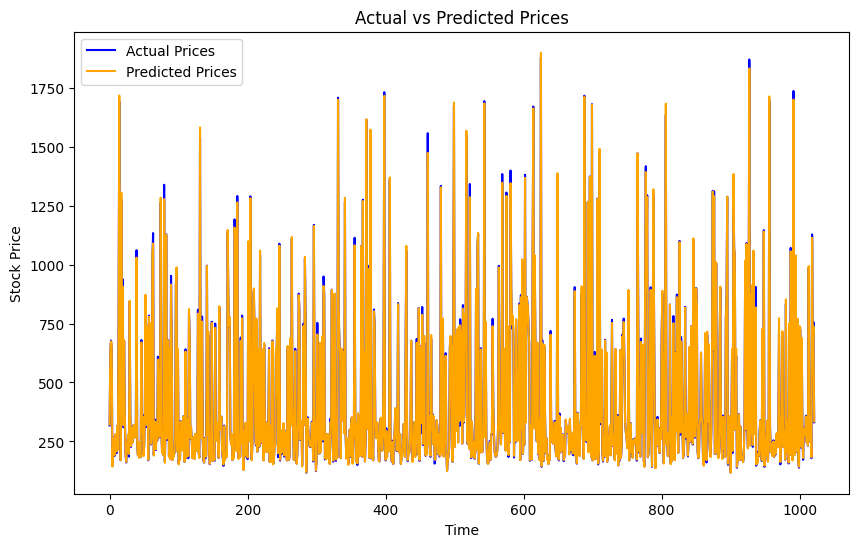

In [358]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
data.dropna(inplace=True)
# Drop the last row with NaN target
data = data.dropna()

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'SMA_20', 'SMA_50', 'Volatility']
X = data[features]
y = data['Target_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [359]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close,Daily_Return,SMA_20
199,2000-10-19,ITC,EQ,740.20,735.00,753.80,730.05,747.0,747.85,741.98,...,3.253202,1.033504,0.055540,-0.225111,762.641,745.70875,21.042919,748.2,0.010335,736.255
200,2000-10-20,ITC,EQ,747.85,755.85,783.50,745.05,746.0,748.20,764.57,...,5.160727,0.046801,0.056034,1.380413,762.041,745.90725,19.503960,746.6,0.000468,735.050
201,2000-10-23,ITC,EQ,748.20,745.05,757.00,742.00,747.0,746.60,748.66,...,2.021563,-0.213847,0.053776,-0.720005,761.605,746.07850,19.500829,759.2,-0.002138,736.155
202,2000-10-24,ITC,EQ,746.60,745.25,762.75,745.25,761.5,759.20,756.58,...,2.348205,1.687651,0.071560,1.122496,761.442,746.24350,20.116473,764.9,0.016877,737.570
203,2000-10-25,ITC,EQ,759.20,760.00,777.00,751.00,765.0,764.90,767.64,...,3.462051,0.750790,0.079605,0.235619,761.515,746.14650,20.944891,767.6,0.007508,739.265


In [360]:
features=['Date','Close']

In [361]:
my_data=data[features]

In [362]:
my_data['Date']=pd.to_datetime(my_data['Date'])

<ipython-input-362-1a6f73018fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Date']=pd.to_datetime(my_data['Date'])


In [363]:
my_data

,Date,Close
199,2000-10-19,747.85
200,2000-10-20,748.20
201,2000-10-23,746.60
202,2000-10-24,759.20
203,2000-10-25,764.90
...,...,...
5300,2021-04-23,205.35
5301,2021-04-26,205.30
5302,2021-04-27,205.40
5303,2021-04-28,205.50


In [364]:
my_data.index=my_data['Date']

In [365]:
del my_data['Date']

<Axes: xlabel='Date'>

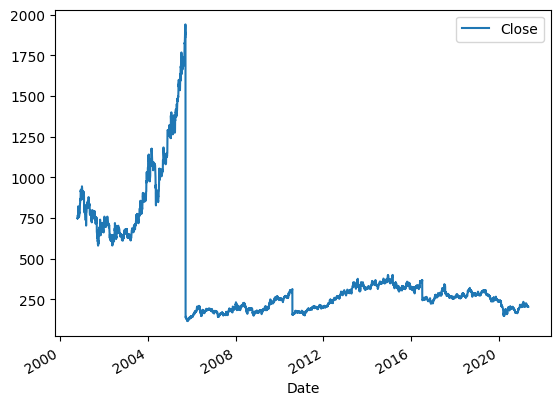

In [366]:
my_data.plot()

In [367]:
std_log=my_data.rolling(window=4).std()

In [368]:
mean_log=my_data.rolling(window=4).mean()

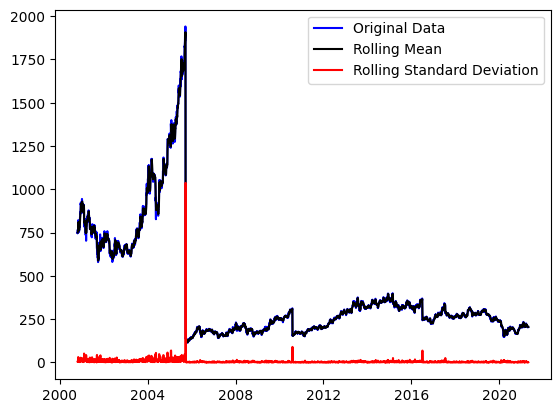

In [369]:
plt.plot(my_data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')

In [370]:
from statsmodels.tsa.stattools  import adfuller

In [371]:
#Augmented DickyFuller Test
result=adfuller(my_data['Close'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [372]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-2.899795325950558
p_value:0.045371803456562124
num_lags:2
num_observations:5103
critical_values:{'1%': -3.4316321070915023, '5%': -2.8621065552117604, '10%': -2.567071577593673}
AIC:47765.861790083116


In [373]:
import numpy as np

In [374]:
first_log=np.log(my_data)

In [375]:
first_log.dropna()

,Close
Date,
2000-10-19,6.617202
2000-10-20,6.617670
2000-10-23,6.615530
2000-10-24,6.632265
2000-10-25,6.639745
...,...
2021-04-23,5.324716
2021-04-26,5.324472
2021-04-27,5.324959


<Axes: xlabel='Date'>

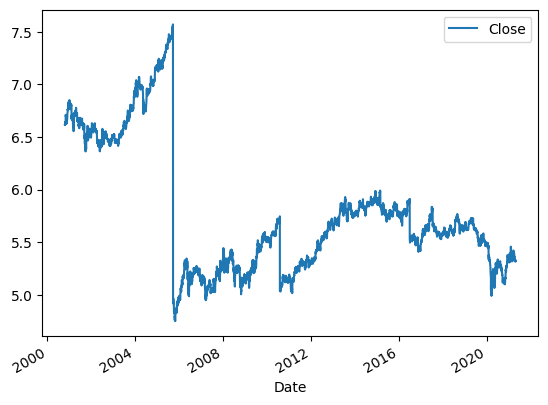

In [376]:
first_log.plot()

In [377]:
new_data=first_log-mean_log

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

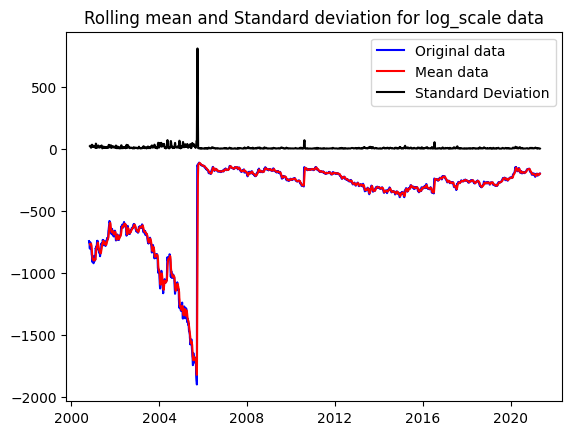

In [378]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original data')
plt.plot(mean_log,color='red',label='Mean data')
plt.plot(std_log,color='black',label='Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

In [379]:
new_data

,Close
Date,
2000-10-19,NaN
2000-10-20,NaN
2000-10-23,NaN
2000-10-24,-743.830235
2000-10-25,-748.085255
...,...
2021-04-23,-199.775284
2021-04-26,-199.700528
2021-04-27,-200.162541


In [380]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

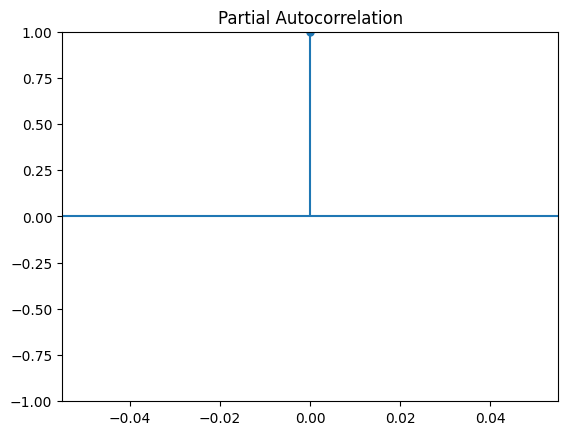

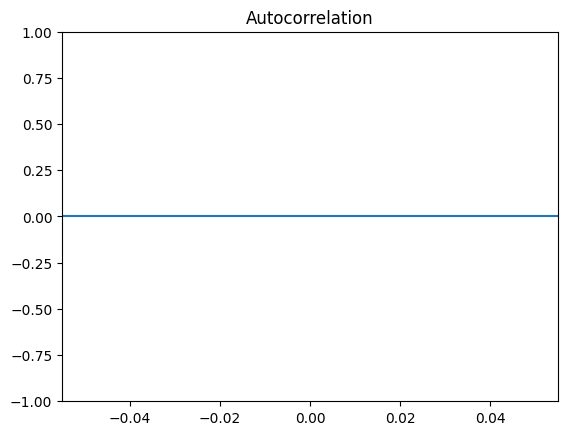

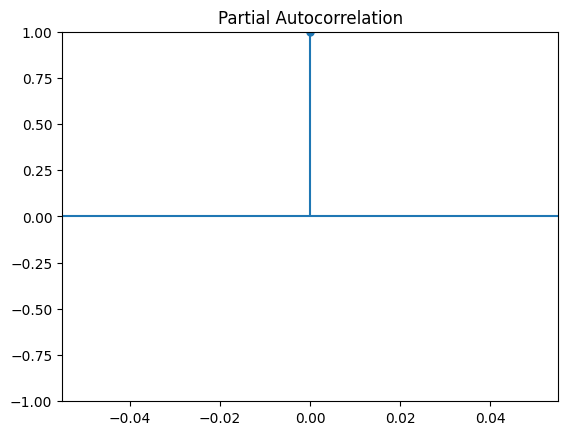

In [381]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

In [382]:
from statsmodels.tsa.arima.model import ARIMA

In [383]:
train=new_df.iloc[:120]['Close']

In [384]:
test=new_df.iloc[120:]

In [385]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [386]:
model_fit=model.fit()

In [387]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -398.395
Date:                Sat, 07 Dec 2024   AIC                            806.790
Time:                        11:31:01   BIC                            820.727
Sample:                             0   HQIC                           812.450
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        351.5666     13.569     25.910      0.000     324.972     378.161
ar.L1          0.9450      0.035     26.758      0.000       0.876       1.014
ma.L1          0.1033      0.076      1.360      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

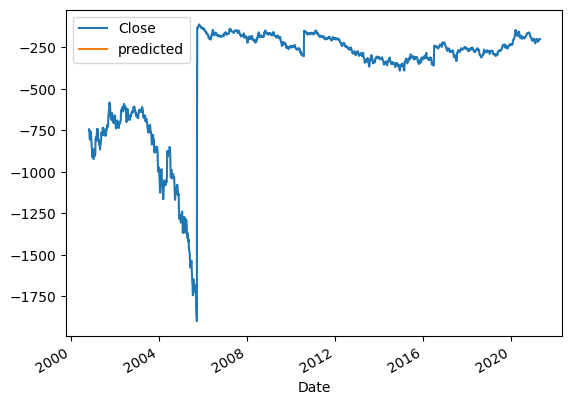

In [388]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

In [389]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [390]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

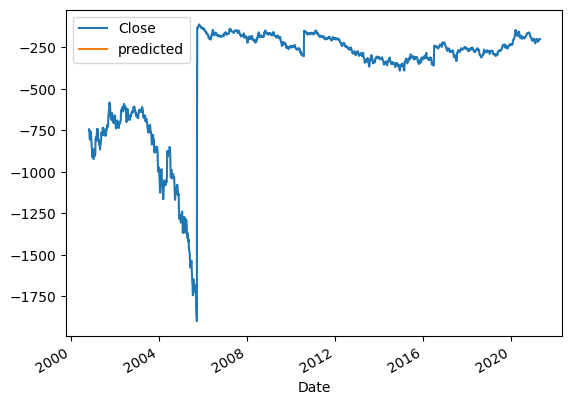

In [391]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


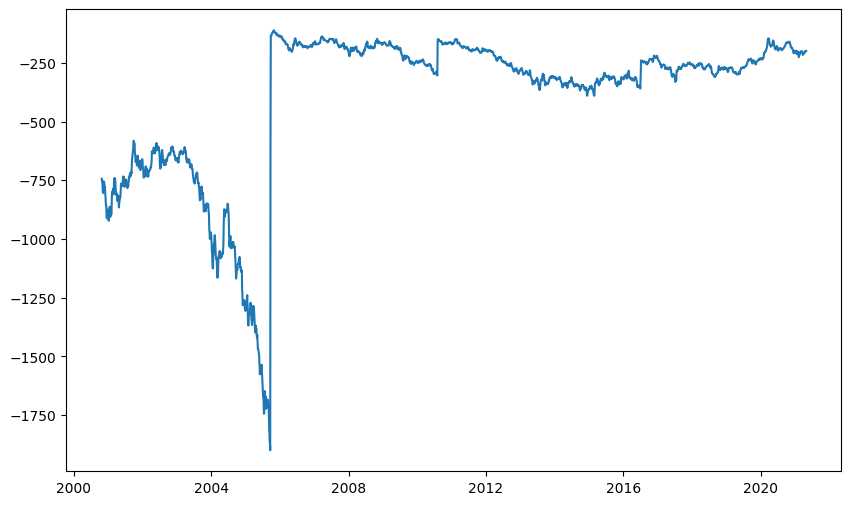

In [392]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['Close'],label='Original Data')

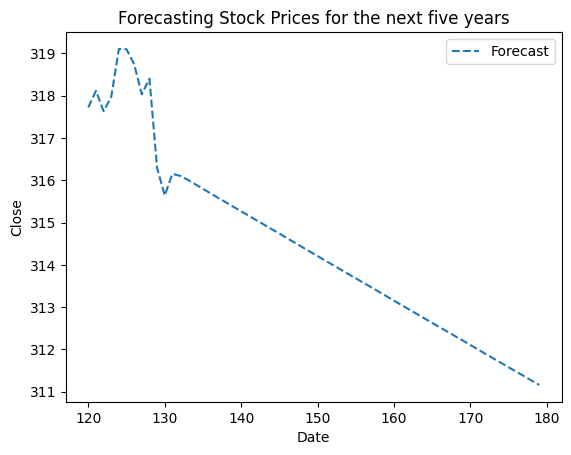

In [393]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Forecasting Stock Prices for the next five years")
plt.legend()